In [12]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import numpy as np
%matplotlib inline

In [13]:
# from google.colab import files
# uploaded = files.upload()
# for fn in uploaded.keys():
#    print('Файл(ы) "{name}" размером {length} байт загружен(ы)'.format(name=fn, length=len(uploaded[fn])))

In [14]:
def show_img_hist(img):
    plt.figure(figsize=(12, 4), dpi=90)
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.subplot(1, 2, 2)
    plt.hist(np.ravel(img), bins=256)
    plt.show()


def show_img_hist_2(img, test_img):
    plt.figure(figsize=(12, 4), dpi=90)
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.subplot(1, 3, 2)
    plt.imshow(test_img)
    plt.subplot(1, 3, 3)
    plt.hist(np.ravel(img), bins=256)
    plt.hist(np.ravel(test_img), bins=256)
    plt.show()



img_fnames = ['arch.jpg', 'Coins.jpg', 'rice.jpg']
imgs = []
for img_fname in img_fnames:
    img = cv2.imread(img_fname)
    imgs.append(img)

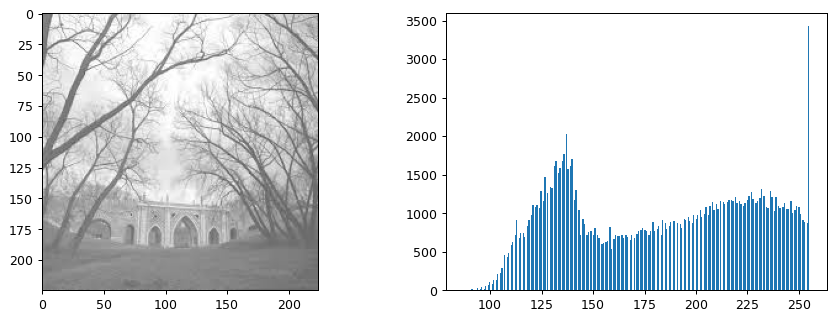

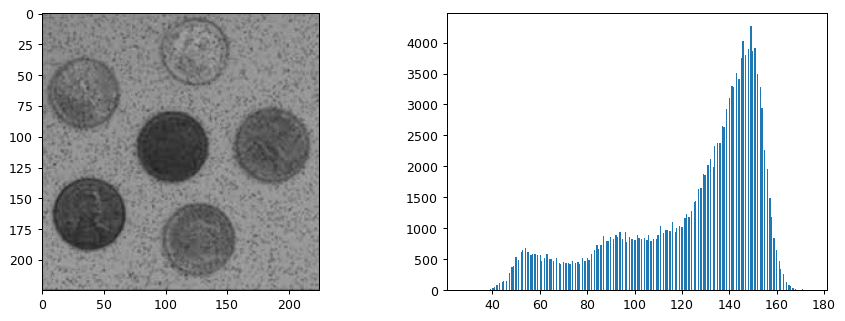

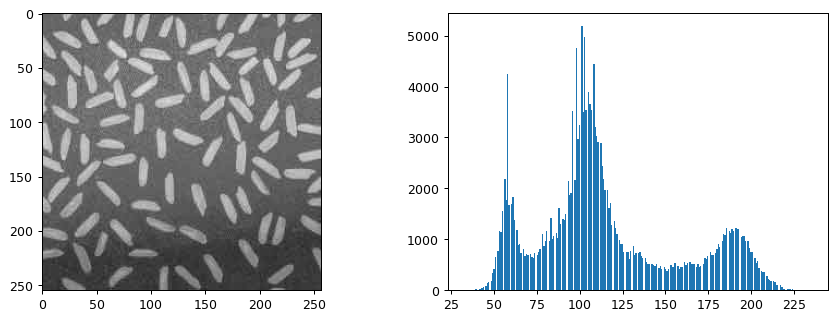

In [15]:
for img in imgs:
    show_img_hist(img)

Гистограммы изображений используют для анализа яркостных и контрастных характеристик цифровых изображений.  
Основываясь на гистограммах тестовых изображений можно видеть: 
1) распределение пикселей по яркости первого изображения в среднем равномерное, нет слишком темных и черных пикселей,
2) второе изображение характеризуется большим количеством пикселей со значениями яркости в диапазоне от 120 до 155
3) в третьем изображении большое количество пикселей со значениями яркости в трех диапазонах, 55-65, 90-120, 180-200 

In [16]:
# Логарифмическое преобразование
def f_log(x):
    c = 25
    return int(c * np.log(x + 1))

# Степенное преоборазование
def f_gamma(x):
    c = 0.001
    return min(255, int(c * x**2.5))

# Кусочно-линейное преобразование
def f_parts(x):
    x1 = 100
    x2 = 200
    if x < x1 or x > x2:
        return int(0.25 * x)
    return float(int(1.75 * x))

# Пороговая сегментация
def f_interval(x):
    x1 = 50
    x2 = 150
    if x2 > x > x1:
        return 255
    return 0


In [17]:

def transform(f, img):
    img_cp = img.copy()
    for i in range(len(img)):
        for j in range(len(img[i])):
            img_cp[i][j] = list(map(f, img[i][j]))
    show_img_hist_2(img, img_cp)

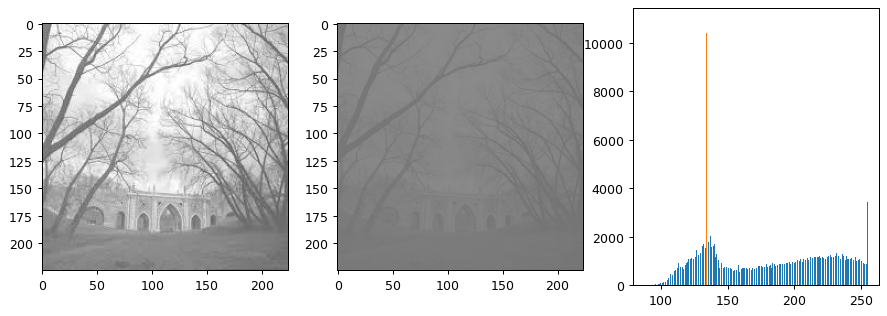

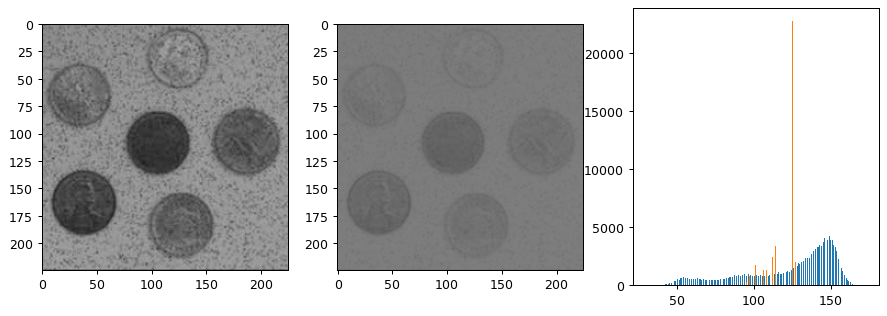

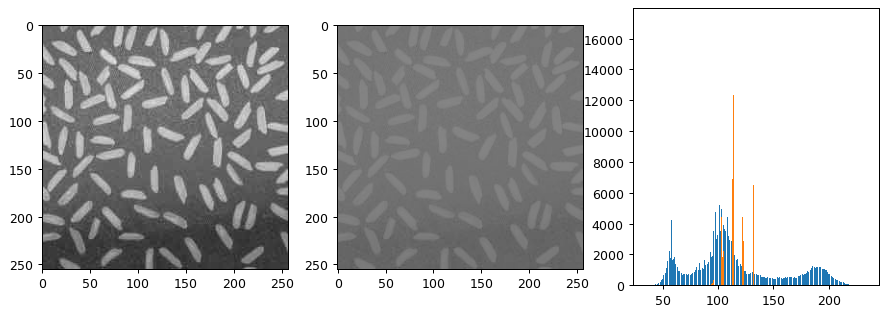

In [18]:
for img in imgs:
    transform(f_log, img)

Прямое логарифмическое преобразование применяется для растяжения диапазона значений темных пикселей на изображении с одновременным сжатием диапазона значений ярких пикселей.  

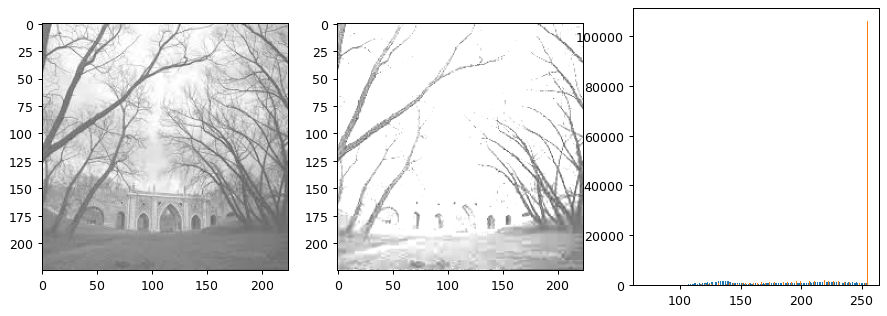

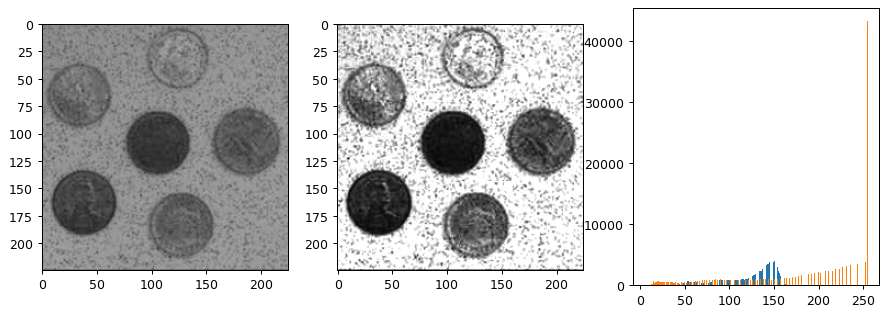

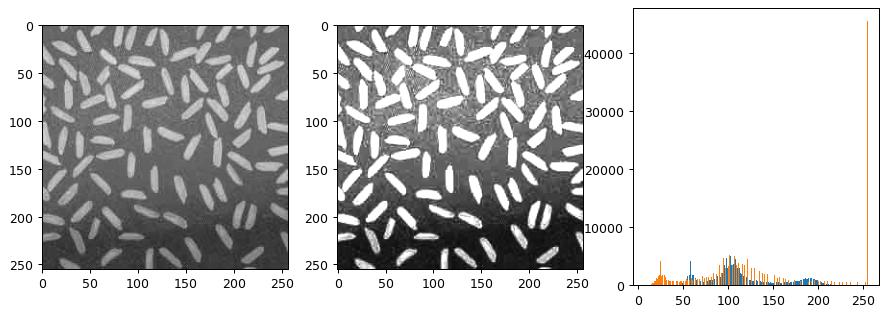

In [19]:
for img in imgs:
    transform(f_gamma, img)

Гамма-коррекция позволяет уменьшать контрастность на темных фрагментах изображения и увеличивать ее на ярких участках.  

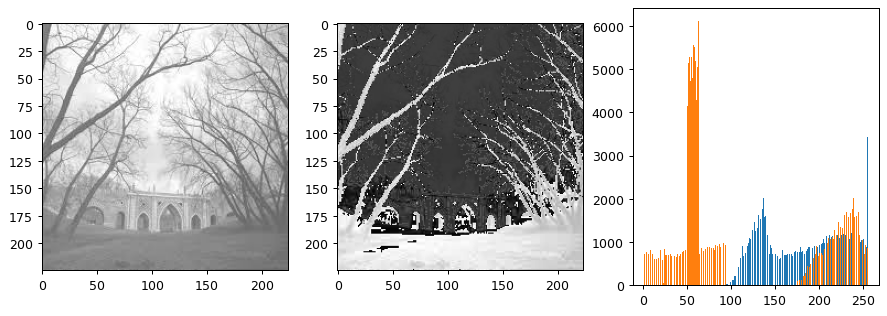

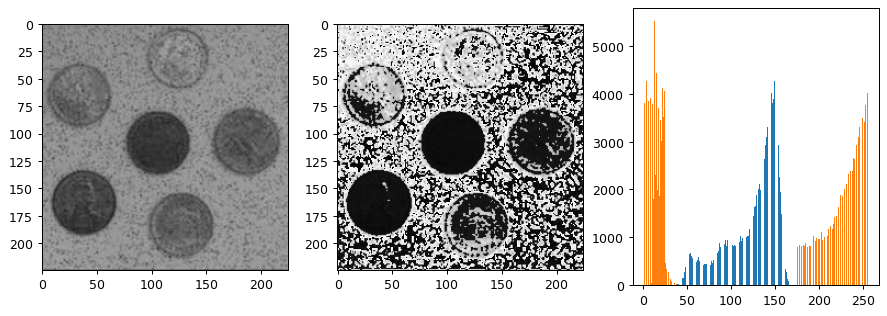

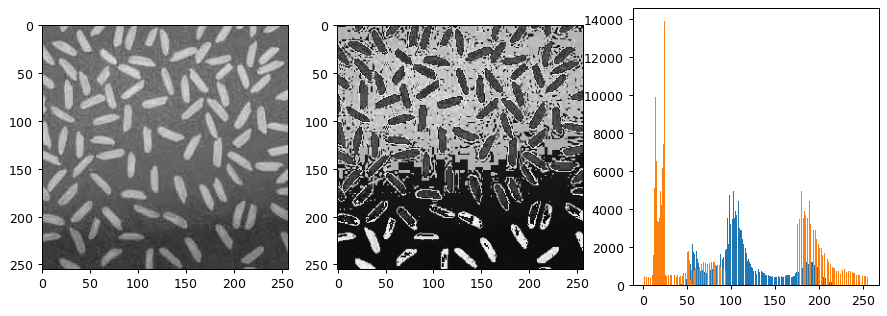

In [20]:
for img in imgs:
    transform(f_parts, img)

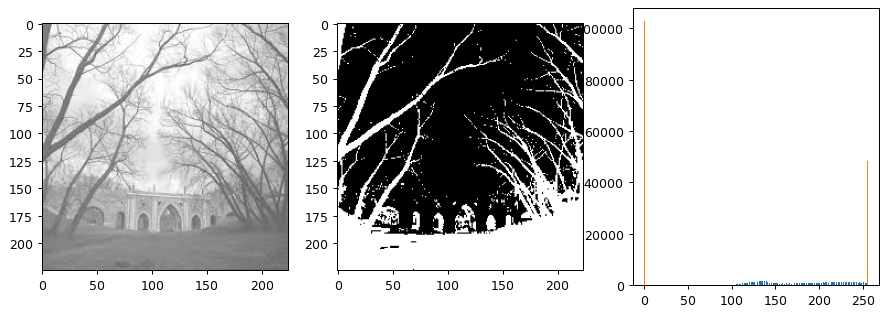

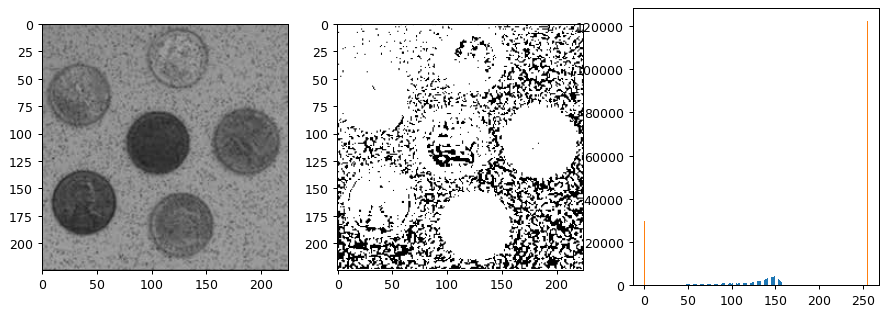

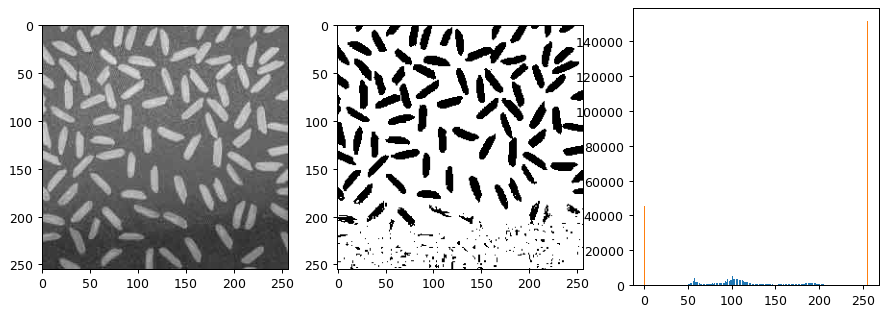

In [21]:
for img in imgs:
    transform(f_interval, img)

При кусочно-линейном преобразовании и пороговой сегментации изменнения касаются выбранных диапазонов значений яркости.